In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, GlobalAveragePooling2D
import warnings
warnings.filterwarnings('ignore')

2024-03-02 10:08:45.706428: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 10:08:45.706568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 10:08:45.877822: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Define the path to your dataset
data_path_train = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train"
data_path_val="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val"
# Specify parameters
img_size = (256, 256)
batch_size = 32

# Use ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Create generators for training and validation sets
train_generator = train_datagen.flow_from_directory(
    data_path_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)
validation_generator = val_datagen.flow_from_directory(
    data_path_val,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.


In [4]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bacterial Pneumonia
1 : Corona Virus Disease
2 : Normal
3 : Tuberculosis
4 : Viral Pneumonia


In [10]:

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the VGG16 base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(train_generator.num_classes, activation='softmax'))


In [11]:
from tensorflow.keras.optimizers import RMSprop, Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
history=model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10


I0000 00:00:1709374401.675373     158 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709374401.698214     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 44/190 ━━━━━━━━━━━━━━━━━━━━ 3:08 1s/step - accuracy: 0.5938 - loss: 1.1669   

W0000 00:00:1709374457.481512     157 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6931 - loss: 0.8151

W0000 00:00:1709374598.234097     157 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


190/190 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.6934 - loss: 0.8141 - val_accuracy: 0.7609 - val_loss: 0.5762
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 187s 961ms/step - accuracy: 0.8115 - loss: 0.4395 - val_accuracy: 0.8090 - val_loss: 0.4622
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 188s 962ms/step - accuracy: 0.8319 - loss: 0.4107 - val_accuracy: 0.6761 - val_loss: 0.8815
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 188s 961ms/step - accuracy: 0.8460 - loss: 0.3673 - val_accuracy: 0.7713 - val_loss: 0.5666
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 187s 950ms/step - accuracy: 0.8506 - loss: 0.3696 - val_accuracy: 0.7922 - val_loss: 0.4869
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 205s 966ms/step - accuracy: 0.8700 - loss: 0.3294 - val_accuracy: 0.8393 - val_loss: 0.3990
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 187s 956ms/step - accuracy: 0.8643 - loss: 0.3260 - val_accuracy: 0.8338 - val_loss: 0.4144
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 187s 959ms/step - accuracy: 0.8731 - loss: 0.3185 

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
data_path_test="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"
test_generator = test_datagen.flow_from_directory(
    data_path_test,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

# Evaluate the model on the test set
results = model.evaluate(test_generator)

# Print the evaluation results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Found 2025 images belonging to 5 classes.
64/64 ━━━━━━━━━━━━━━━━━━━━ 54s 846ms/step - accuracy: 0.8294 - loss: 0.4287
Test Loss: 0.36352965235710144
Test Accuracy: 0.8558024764060974


W0000 00:00:1709376474.123492     157 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [14]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred, target_names=labels.values()))

 1/64 ━━━━━━━━━━━━━━━━━━━━ 53s 845ms/step

W0000 00:00:1709376503.953301     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 321ms/step
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.71      0.73      0.72       403
Corona Virus Disease       0.95      0.97      0.96       407
              Normal       0.90      0.96      0.93       404
        Tuberculosis       0.96      1.00      0.98       408
     Viral Pneumonia       0.72      0.63      0.67       403

            accuracy                           0.86      2025
           macro avg       0.85      0.86      0.85      2025
        weighted avg       0.85      0.86      0.85      2025



W0000 00:00:1709376524.154855     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step


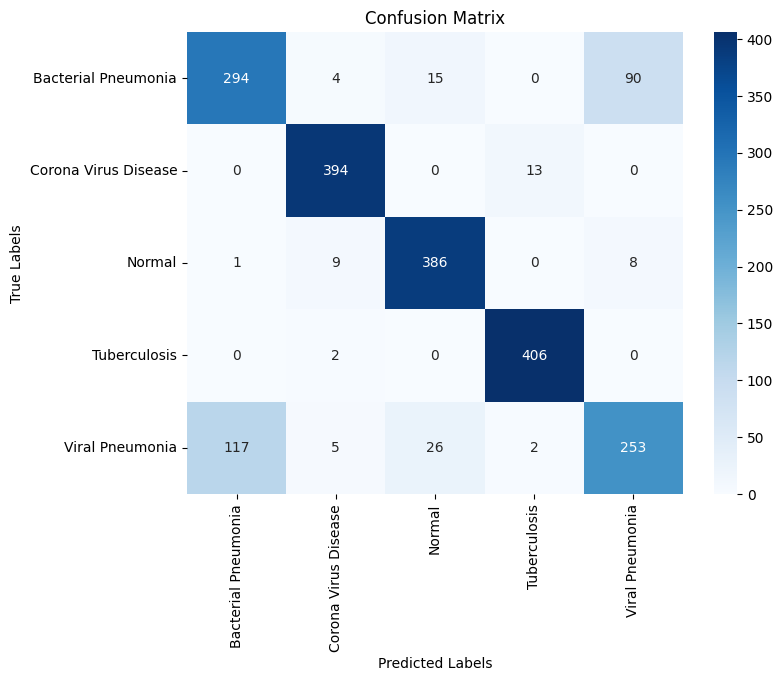

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get the true labels
true_labels = test_generator.classes

# Predict the labels using the model
predictions = model.predict(test_generator)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()